In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd #for reading the data
from sklearn.preprocessing import MinMaxScaler #for data standardization
from sklearn.model_selection import train_test_split #to split the data into train and test parts
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder #to encode the data to numerical
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report, cohen_kappa_score, matthews_corrcoef, log_loss, \
ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV #for cross validation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# A function that would plot for us the decision regions of a problem
from mlxtend.plotting import plot_decision_regions

# This library will be used to measure the difference in times between the start and the end of a process
import time
import numpy as np

## Data Preprocessing

#### Load the data in pandas data frame

In [3]:
data = pd.read_csv("social.csv", dtype = str)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.00,19000.00,0
1,15810944,Male,35.00,20000.00,0
2,15668575,Female,26.00,43000.00,0
3,15603246,Female,27.00,57000.00,0
4,15804002,Male,19.00,76000.00,0


#### Explore the data 

In [4]:
#Explore the distribution of the two classes. 
#  0 means no purchase
#  1 means purchased
data['Purchased'].value_counts(normalize = True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [5]:
#Explore the data types
print(data.dtypes)

User ID            object
Gender             object
Age                object
EstimatedSalary    object
Purchased          object
dtype: object


In [6]:
# drop the User ID and Gender column from our data,
data = data.drop(['User ID', 'Gender'], axis = 1)
data

,Age,EstimatedSalary,Purchased
0,19.00,19000.00,0
1,35.00,20000.00,0
2,26.00,43000.00,0
3,27.00,57000.00,0
4,19.00,76000.00,0
...,...,...,...
395,46.00,41000.00,1
396,51.00,23000.00,1
397,50.00,20000.00,1
398,36.00,33000.00,0


In [7]:
#Cast remaining data columns to floats or int
data["Age"] = data["Age"].astype(float)
data["EstimatedSalary"] = data["EstimatedSalary"].astype(float)
data["Purchased"] = data["Purchased"].astype(int)

In [8]:
#check to see if we've worked correctly
print(data.dtypes)

Age                float64
EstimatedSalary    float64
Purchased            int32
dtype: object


In [9]:
#Check for missing values. There are none. This means we can proceed.
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Split the data into targets and inputs

In [10]:
target = data['Purchased']
inputs = data.drop(['Purchased'],axis=1)

### Split the data into train and test sets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, random_state=365, stratify = target)

In [12]:
#check the result of the stratification
pd.Series(y_train).value_counts(normalize = True)

0    0.642857
1    0.357143
Name: Purchased, dtype: float64

In [13]:
#Rescale the features to [-1, 1] for the support vector classification
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train_rescaled = scaling.transform(x_train)

### Classification with a linear SVM

In [14]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C)
svc.fit(x_train_rescaled, y_train) #train the svm

SVC(kernel='linear')

In [15]:
y_pred_test = svc.predict(scaling.transform(x_test)) #predict on test data

### Analyze the results of the SVM

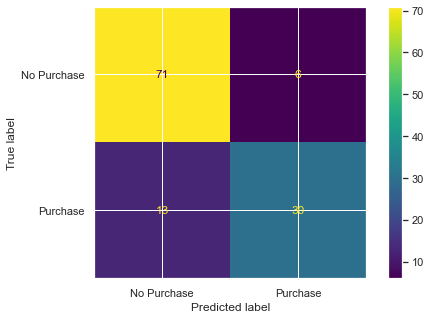

In [16]:
#Analyze the results of the classifier first with the help of a confusion matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_test),
    display_labels=["No Purchase", "Purchase"],
)

cmp.plot(ax=ax);

In [17]:
#The classification report of the linear classifer.

print(classification_report(y_test, y_pred_test, target_names = ["Not Purchased", "Purchased"]))

               precision    recall  f1-score   support

Not Purchased       0.85      0.92      0.88        77
    Purchased       0.83      0.70      0.76        43

     accuracy                           0.84       120
    macro avg       0.84      0.81      0.82       120
 weighted avg       0.84      0.84      0.84       120

